# Bank Customer Churn

In [1]:
#Imporing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

In [19]:
#read_data
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
print("shape of data: ",df.shape)

shape of data:  (10000, 14)


In [4]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
len(df[df.duplicated()])

0

## Univariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

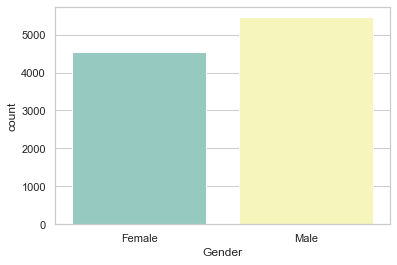

In [8]:
sns.set(style="whitegrid")
sns.countplot(data=df, x='Gender', palette="Set3")

<AxesSubplot:xlabel='Geography', ylabel='count'>

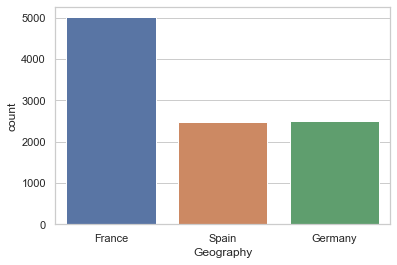

In [9]:
sns.set(style="whitegrid")
sns.countplot(x="Geography", data=df)

<AxesSubplot:ylabel='Exited'>

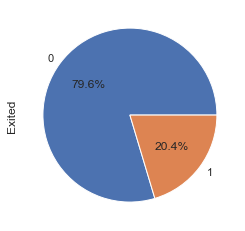

In [10]:
df.Exited.value_counts().plot(kind="pie", autopct='%1.1f%%')

## Data Pre Processing

In [11]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


## Creating Model and Evaluation

In [13]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [15]:
rf_classifier= RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=50,
                       random_state=42)
rf_classifier.fit(X, y)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=50,
                       random_state=42)

In [16]:
y_pred = rf_classifier.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: ",accuracy*100,"%")
print(f"Precision: ",precision)
print(f"Recall: ",recall)
print(f"F1 Score: ", f1)
print(f"ROC-AUC Score: {roc_auc:.2f}")

Accuracy:  97.36666666666667 %
Precision:  0.9871794871794872
Recall:  0.8821603927986906
F1 Score:  0.9317199654278305
ROC-AUC Score: 0.94


[[2382    7]
 [  72  539]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2389
           1       0.99      0.88      0.93       611

    accuracy                           0.97      3000
   macro avg       0.98      0.94      0.96      3000
weighted avg       0.97      0.97      0.97      3000



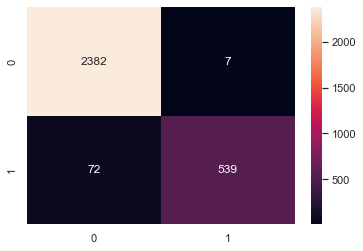

In [18]:
cm=confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='.5g')
print(classification_report(y_test, y_pred))